# Введение в искусственные нейронные сети
# Урок 2. Keras

**Попробуйте обучить нейронную сеть на Keras на Fashion-MNIST датасете. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?**

**Сначала результаты и выводы:**

1) То, что изначально получилось на основе методички:
- loss 0.38
- accuracy: 0.864<br>
Уже неплохо.

2) То, что было сделано для улучшения точности:
- увеличил количество эпох до 50 (было 5)
- увеличил количество batch до 256 (было 32)
- добавил доплнительный слой (был 1, стало 2)
- увеличил количество нейронов в слоях с 64 до 256
- приравнял размер первого слоя к размеру входного вектора<br>

**Итог:**<br>
- loss 0.69
- accuracy: 0.89<br>

Не очень-то и помогли все телодвижения. Модель в ее первозданном виде и так справлялась с предсказанием хорошего качества. Огорчение вызывает увеличение loss. Видимо, нужны более тонкие настройки, но я не стал рвать тельник в погоне за красивым результатам. Тренд понятен: ищи баланс в квадрате слой-эпоха-нейроны-batch.

**PS: исполнено в Colab, хотя и непривычно**

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [236]:
fashion_mnist

<module 'keras.datasets.fashion_mnist' from '/usr/local/lib/python3.6/dist-packages/keras/datasets/fashion_mnist.py'>

Получаем датасет Fashion- MINST и анализируем его содержимое. Кстати, fashion_mnist это не совсем датасет, а модуль, вшитый в Keras.

Train: x=(60000, 28, 28), y=(60000,)
Test: x=(10000, 28, 28), y=(10000,)


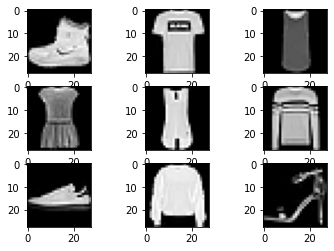

In [237]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print('Train: x=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: x=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

plt.show()

Итак, тренировочный датасет Fashion-MNIST состоит из 60000 изображений 28 на 28 пикселей. Тестовый состоит из 10 000 изображений. Датасеты поделены по умолчанию.
Конверитируем значения пикселей из вида от 1 до 255 в набор значений от -0.5 до 0.5.

In [238]:
train_images = (x_train / 255) * 2 - 1
test_images = (x_test / 255) * 2 - 1

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


**Создание модели**

In [239]:

model = Sequential([
  Dense(784, activation='relu', input_shape=(784,)),
  Dense(256, activation='relu'),
  Dense(256, activation='relu'),
  Dense(10, activation='softmax'),
])

**Компиляция модели**

In [240]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

In [241]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_72 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_73 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_74 (Dense)             (None, 10)                2570      
Total params: 884,762
Trainable params: 884,762
Non-trainable params: 0
_________________________________________________________________


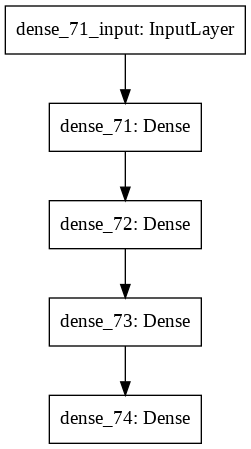

In [242]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [243]:
yy=to_categorical(train_labels,10)
yy[0,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [244]:
train_labels[0]

9

**Потренируем и оценим модель**

In [245]:
model.fit(train_images, to_categorical(train_labels,10), epochs=50, batch_size=256, validation_split=0.2)

model.evaluate(test_images, to_categorical(test_labels))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 23us/step - loss: 0.5219 - accuracy: 0.8105 - val_loss: 0.4356 - val_accuracy: 0.8367
Epoch 2/50
48000/48000 [==============================] - 1s 20us/step - loss: 0.3701 - accuracy: 0.8638 - val_loss: 0.3914 - val_accuracy: 0.8553
Epoch 3/50
48000/48000 [==============================] - 1s 19us/step - loss: 0.3262 - accuracy: 0.8789 - val_loss: 0.4078 - val_accuracy: 0.8557
Epoch 4/50
48000/48000 [==============================] - 1s 20us/step - loss: 0.3040 - accuracy: 0.8871 - val_loss: 0.3425 - val_accuracy: 0.8773
Epoch 5/50
48000/48000 [==============================] - 1s 20us/step - loss: 0.2782 - accuracy: 0.8958 - val_loss: 0.3259 - val_accuracy: 0.8835
Epoch 6/50
48000/48000 [==============================] - 1s 20us/step - loss: 0.2623 - accuracy: 0.9027 - val_loss: 0.3322 - val_accuracy: 0.8788
Epoch 7/50
48000/48000 [==============================] - 1s 20us/st

[0.6876832719013095, 0.8903999924659729]

In [246]:
N_test = 10

predictions = model.predict(test_images[:N_test])

print(np.argmax(predictions, axis=1))

print(test_labels[:N_test])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


In [247]:
predictions[0,:]

array([5.3315370e-09, 2.3446719e-07, 3.2864071e-07, 1.1584967e-06,
       3.9111009e-10, 4.7911890e-05, 3.5082127e-08, 1.3234796e-03,
       2.7330433e-08, 9.9862683e-01], dtype=float32)

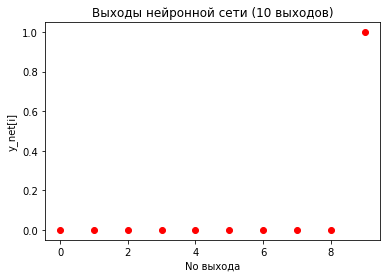

In [248]:
plt.plot(predictions[0,:], 'or')
plt.title('Выходы нейронной сети (10 выходов)')
plt.xlabel('No выхода')
plt.ylabel('y_net[i]')
plt.show()

In [249]:
y_pred = np.argmax(predictions, axis=1)

In [250]:
y_pred[:N_test]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

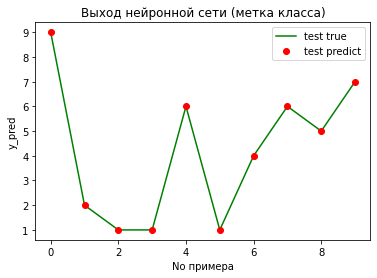

In [251]:
plt.plot(testn_labels[:N_test], 'g',label = 'test true')
plt.plot(y_pred[:N_test], 'or',label='test predict')
plt.legend()
plt.title('Выход нейронной сети (метка класса)')
plt.xlabel('No примера')
plt.ylabel('y_pred')
plt.show()

In [252]:
model.save_weights('model.h5')